In [177]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

from fast_ml import eda

from fast_ml.utilities import display_all, reduce_memory_usage
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##### Load the saved sample data - Feather Format

In [178]:
%time trans = pd.read_feather('tmp/train_transaction_sample')

df_size = trans.memory_usage().sum() / 1024**2
print(f'Memory usage of dataframe is {df_size} MB')
print (f'Shape of dataframe is {trans.shape}')

CPU times: user 1.21 s, sys: 1.13 s, total: 2.34 s
Wall time: 1.97 s
Memory usage of dataframe is 183.67779541015625 MB
Shape of dataframe is (200000, 394)


## EDA

### Summary of the Dataset

In [ ]:
# Using fast_ml function to get a summary view. display_all is a function imported from fast_ml.utilities
summary_df = eda.df_summary(trans)
display_all(summary_df)

#### C1-C14 except C3
* very long tail of values. 
* No missing value

#### C3
* Numerical type but looks like categorical

#### M1-M9
* Categorical variable with just 2 categories T & F
* high perc of missing
* M4 : is different it has M0, M1, M2
* <b>Missing value imputation : </b> 
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>

#### V1-V11
* Numeric type but looks like categorical
* Same number of missing values. possible that same rows have missing values
* high perc of missing ~48%. 
* <b>Missing value imputation : </b> use custom value imputation
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>


#### V12-V34
* Numeric type but looks like categorical
* Same number of missing values. possible that same rows have missing values
* high perc of missing ~13%. 
* Investigate whether frequent value imputation or custom value what would make more sense
* <b>Missing value imputation : </b> 
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>

#### V34-V52
* Numeric type but looks like categorical
* Same number of missing values. possible that same rows have missing values
* high perc of missing ~29%. 
* Investigate whether frequent value imputation or custom value what would make more sense
* <b>Missing value imputation : </b> 
* <b>Rare Encoding : </b>
* <b>Categorical Encoding : </b>


#### V53-V74

#### V75-V94

#### V95-V137

#### V138-V166


---
### Checking V variables
#### Numeric type but Categorical 
* V1 - V94 They all look to have low cardinality
* V107 - V125 They all look to have low cardinality

#### Numerical
* 95, 96, 97, 101, 102, 103, V126 - V137, 

#### Investigate further
* 99, 105, 106

## Identifying Categorical and Numerical Variable

### 1. For V Variables

In [7]:
V_vars = ['V'+str(i) for i in range(1,340)]

In [ ]:
summary_df.query('num_unique_values < 100')

### C1-C14 

### Check V variables

#### 1. V1-11

In [ ]:
V_vars = ['V'+str(i) for i in range(1,12)]
eda.categorical_plots(trans, V_vars, add_missing=True, add_rare=False, rare_tol=5)

In [ ]:
eda.categorical_plots_with_target(trans, V_vars, target = 'isFraud', model = 'clf', add_missing=True)

In [ ]:
# to check for rare encoding
eda.categorical_plots_with_rare_and_target(trans, V_vars, target = 'isFraud', model='clf', rare_v1=5, rare_v2=10)

In [9]:
bins = set(list(np.percentile(trans['TransactionAmt'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])))
bins

{0.2509765625,
 25.953125,
 35.9375,
 49.0,
 57.9375,
 68.9375,
 100.0,
 117.0,
 160.0,
 275.0,
 6452.0}

In [13]:
bins = list(np.percentile(trans['TransactionAmt'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))
print(bins)
bins = set(list(np.percentile(trans['TransactionAmt'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])))
print(bins)
bins = sorted(bins)
print(bins)

[0.2509765625, 25.953125, 35.9375, 49.0, 57.9375, 68.9375, 100.0, 117.0, 160.0, 275.0, 6452.0]
{0.2509765625, 160.0, 35.9375, 68.9375, 100.0, 49.0, 275.0, 6452.0, 117.0, 25.953125, 57.9375}
[0.2509765625, 25.953125, 35.9375, 49.0, 57.9375, 68.9375, 100.0, 117.0, 160.0, 275.0, 6452.0]


In [40]:
var = 'C1'
tmp = trans[var].dropna()
bins = list(np.percentile(tmp, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))
print(bins)

bins = set(list(np.percentile(tmp, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])))
print(bins)

bins = sorted(bins)
print(bins)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 7.0, 4680.0]
{0.0, 1.0, 2.0, 3.0, 7.0, 4680.0}
[0.0, 1.0, 2.0, 3.0, 7.0, 4680.0]


In [38]:
var = 'C1'
tmp = trans[var].dropna()
bins = list(np.percentile(tmp, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))
print(bins)

unique_bins = []
[unique_bins.append(b) for b in bins if b not in unique_bins]
print(unique_bins)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 7.0, 4680.0]
[0.0, 1.0, 2.0, 3.0, 7.0, 4680.0]


In [179]:
option1 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
var = 'card2'
target = 'isFraud'
s = trans[var].dropna()
bins = sorted(set(list(np.percentile(s, option1))))
print(bins)

[100.0, 111.0, 191.0, 260.0, 321.0, 361.0, 445.0, 490.0, 543.0, 555.0, 600.0]


In [47]:
s

0         188.0
1         170.0
2         264.0
3         462.0
4         297.0
          ...  
199995    452.0
199996    321.0
199997    555.0
199998    482.0
199999    113.0
Name: card2, Length: 196991, dtype: float16

In [ ]:
tmp = trans.copy()
tmp[var+'_bins'] = pd.cut(s, bins = bins, include_lowest=True)
tmp[var+'_bins'] = tmp[var+'_bins'].astype('object')
tmp[var+'_bins'].fillna('Missing', inplace = True)
tmp[var+'_bins'].value_counts()

In [84]:
c1 = pd.crosstab(tmp[var+'_bins'], tmp[target])
cat_order = (c1.index)
print(cat_order)
c1 = c1.reset_index()
c1.rename(columns={0:'target_0', 1:'target_1'}, inplace=True)
c1['total'] = c1['target_0'] + c1['target_1']
c1['total_perc'] = 100*c1['total']/sum(c1['total'])
c1['target_1_perc_overall'] = 100*c1['target_1']/sum(c1['target_1'])
c1['target_1_perc_within'] = 100*c1['target_1']/( c1['target_0'] + c1['target_1'])
c1

Index([(99.999, 111.0],  (111.0, 191.0],  (191.0, 260.0],  (260.0, 321.0],
        (321.0, 361.0],  (361.0, 445.0],  (445.0, 490.0],  (490.0, 543.0],
        (543.0, 555.0],  (555.0, 600.0],       'Missing'],
      dtype='object', name='card2_bins')


isFraud,card2_bins,target_0,target_1,total,total_perc,target_1_perc_overall,target_1_perc_within
0,"(99.999, 111.0]",19357,558,19915,9.9575,7.912649,2.801908
1,"(111.0, 191.0]",18560,1009,19569,9.7845,14.307998,5.156114
2,"(191.0, 260.0]",19221,402,19623,9.8115,5.700510,2.048616
3,"(260.0, 321.0]",27875,1012,28887,14.4435,14.350539,3.503306
4,"(321.0, 361.0]",12030,386,12416,6.2080,5.473625,3.108892
5,"(361.0, 445.0]",17480,762,18242,9.1210,10.805445,4.177174
6,"(445.0, 490.0]",22509,583,23092,11.5460,8.267158,2.524684
7,"(490.0, 543.0]",16628,753,17381,8.6905,10.677822,4.332317
8,"(543.0, 555.0]",22147,996,23143,11.5715,14.123653,4.303677
9,"(555.0, 600.0]",14275,448,14723,7.3615,6.352808,3.042858


In [229]:
def numerical_bins_with_target (df, variables, target, model='clf', method='10p', custom_buckets=None):

    if method == '5p':
        buckets = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
    elif method == '10p':
        buckets = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    elif method == '20p':
        buckets = [0, 20, 40, 60, 80, 100]
    elif method == '25p':
        buckets = [0, 25, 50, 75, 100]
    elif method == '95p':
        buckets = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100]
    elif method == '98p':
        buckets = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98, 100]
    elif method == 'custom':
        buckets = custom_buckets

    eda_df = df.copy()
    for var in variables:
        
        s = eda_df[var].dropna()
        bins = sorted(set(list(np.percentile(s, buckets))))
        eda_df[var+'_bins'] = pd.cut(s, bins = bins, include_lowest=True)
        eda_df[var+'_bins'] = eda_df[var+'_bins'].astype('object')
        eda_df[var+'_bins'].fillna('Missing', inplace = True)

        plot_df = pd.crosstab(eda_df[var+'_bins'], eda_df[target])
        cat_order = (plot_df.index)
        plot_df = plot_df.reset_index()
        plot_df.rename(columns={0:'target_0', 1:'target_1'}, inplace=True)
        plot_df['total'] = plot_df['target_0'] + plot_df['target_1']
        plot_df['total_perc'] = 100*plot_df['total']/sum(plot_df['total'])
        plot_df['target_1_perc_overall'] = 100*plot_df['target_1']/sum(plot_df['target_1'])
        plot_df['target_1_perc_within'] = 100*plot_df['target_1']/( plot_df['target_0'] + plot_df['target_1'])
        
        # Graph 1
        fig, ax = plt.subplots(figsize=(14,4))
        plt.xticks(plot_df.index, cat_order, rotation = 90)
        ax.bar(plot_df.index, plot_df['total_perc'], align = 'center', color = 'lightgrey')

        ax2 = ax.twinx()
        ax2 = sns.pointplot(data = plot_df, x=var+'_bins', y='target_1_perc_overall', order = cat_order, color='black')
        ax.set_title(f'Event rate of target ({target}) across all categories of variable ({var}) Bins', fontsize=17)
        #ax.set_xlabel(var, fontsize=14)
        ax.set_ylabel('Perc of Categories', fontsize=14)
        ax2.set_ylabel("Perc of Events across all Categories", fontsize=14)
        hline1 = round(plot_df['target_1_perc_overall'].mean(),1)
        ax2.axhline(y=hline1, color = 'darkred')
        for pt in range(0, plot_df.shape[0]):
            ax.text(plot_df.index[pt]-0.04, 
                     plot_df.total_perc[pt]+0.04, 
                     str(round(plot_df.total_perc[pt],1))+'%',
                     fontdict = {'size': 8, 'color':'grey'})
            
            ax2.text(plot_df.index[pt]+0.05, 
                     plot_df.target_1_perc_overall[pt], 
                     str(round(plot_df.target_1_perc_overall[pt],1))+'%',
                     fontdict = {'size': 8, 'color':'black'})
        ax2.text(plot_df.index[-2], hline1+0.01, "Avg Event Rate (overall): "+str(hline1)+'%')
        plt.show()

        # Graph 2
        fig, ax = plt.subplots(figsize=(14,4))
        plt.xticks(plot_df.index, cat_order, rotation = 90)
        ax.bar(plot_df.index, plot_df['total_perc'], align = 'center', color = 'lightgrey')

        ax2 = ax.twinx()
        ax2 = sns.pointplot(data = plot_df, x=var+'_bins', y='target_1_perc_within', order = cat_order, color='green')
        ax.set_title(f'Event Rate of target ({target}) within each category of variable ({var}) Bins', fontsize=17)
        ax2.set_ylabel("Perc of Events within Category", fontsize=14)
        #ax.set_xlabel(var, fontsize=14)
        ax.set_ylabel('Perc of Categories', fontsize=14)
        hline2 = round(plot_df['target_1_perc_within'].mean(),1)
        ax2.axhline(y=hline2, color = 'magenta')
        for pt in range(0, plot_df.shape[0]):
            ax.text(plot_df.index[pt]-0.04, 
                     plot_df.total_perc[pt]+0.04, 
                     str(round(plot_df.total_perc[pt],1))+'%',
                     fontdict = {'size': 8, 'color':'grey'})
            
            ax2.text(plot_df.index[pt]+0.05, 
                     plot_df.target_1_perc_within[pt], 
                     str(round(plot_df.target_1_perc_within[pt],1))+'%',
                     fontdict = {'size': 8, 'color':'green'})
        ax2.text(plot_df.index[-2], hline2+0.01, "Avg Event Rate (within): "+str(hline2)+'%')
        plt.show()

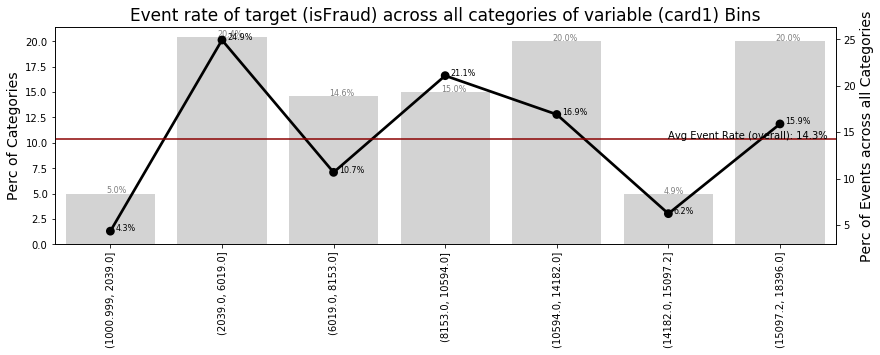

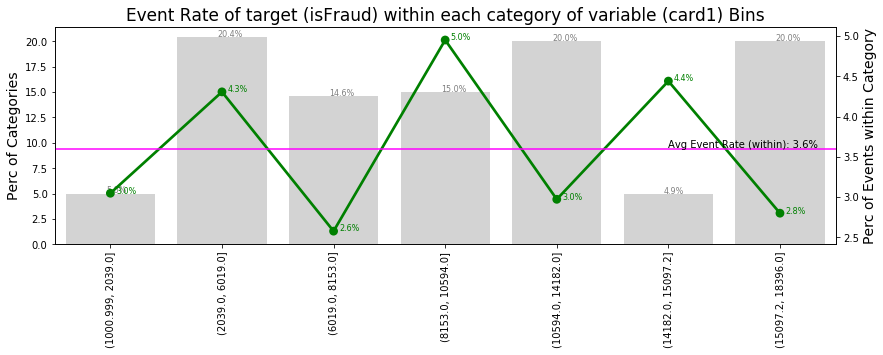

In [230]:
custom_b = [0,5,25,40,55,75,80,100]
numerical_bins_with_target(trans, ['card1'], target = 'isFraud', method = 'custom', custom_buckets=custom_b)

In [ ]:
[0,5,25,40,55,75,80,100]